In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#Visualisation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus



churn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


churn_data.head()

churn_data.shape


(7043, 21)

In [2]:
#View Data

churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#target variable value count
print(churn_data["Churn"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [4]:
#Replace catagorical values with numerical values



#Churn
churn_data["Churn"].replace(["No","Yes"],[0,1],inplace =True)

#Male = 1, Female = 0
churn_data["gender"].replace(["Male","Female"],[1,0],inplace =True)


#Partner
churn_data["Partner"].replace(["Yes","No"],[1,0],inplace =True)


#Dependents
churn_data["Dependents"].replace(["Yes","No"],[1,0],inplace =True)

#Multiplelines
churn_data["MultipleLines"].replace(["Yes","No","No phone service"],[1,0,2],inplace = True)


#Phone Service
churn_data["PhoneService"].replace(["Yes","No"],[1,0],inplace =True)


#Internet Service
churn_data["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)


#Contract
churn_data["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)


#Tech Support
churn_data["TechSupport"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)

#Online Security
churn_data["OnlineSecurity"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#Device Protection
churn_data["DeviceProtection"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#Streaming Movies
churn_data["StreamingMovies"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#Streaming TV
churn_data["StreamingTV"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)

#OnlineBackup
churn_data["OnlineBackup"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#PaperlessBilling
churn_data["PaperlessBilling"].replace(["No","Yes"],[0,1],inplace =True)


#PaymentMethod
churn_data["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)


#totalcharges
churn_data["TotalCharges"].replace([" "],[0],inplace = True)
churn_data["TotalCharges"] =churn_data["TotalCharges"].astype('float')

churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,2,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,2,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [5]:
#split dataset in features and target variable
X = churn_data.iloc[:, 1:20] #Features
y = churn_data["Churn"] #Target variable

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65


### 1.Split your data into train and test sets

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


### 2.Get basic descriptive statistics for the training data and check for missing and incorrect values.

In [7]:
churn_data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,0.777084,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.658952,0.592219,1.315633,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.801943,0.491457,1.148907,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### 3.What are the factors that predict user churn?

In [8]:
churn_data.corr().style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1,-0.00187371,-0.00180808,0.0105166,0.00510622,-0.00648767,-0.000484598,0.0103802,-0.00342855,-0.00203218,0.00509166,0.000985182,0.00115629,-0.000190735,0.00617098,-0.0117537,-0.00520929,-0.0145693,-8.03035e-05,-0.0086121
SeniorCitizen,-0.00187371,1,0.0164787,-0.211185,0.0165669,0.0085764,0.0998834,-0.25939,-0.210897,-0.15278,-0.157095,-0.22377,-0.13013,-0.120802,-0.109299,0.15653,-0.093704,0.220173,0.103006,0.150889
Partner,-0.00180808,0.0164787,1,0.452676,0.379697,0.0177057,0.0909813,0.000131882,0.0818497,0.087055,0.0944515,0.0690715,0.080127,0.0757787,0.216229,-0.0148766,0.133115,0.0968479,0.317504,-0.150448
Dependents,0.0105166,-0.211185,0.452676,1,0.159712,-0.00176168,-0.0168755,0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.12582,0.178429,-0.111377,0.123844,-0.11389,0.0620782,-0.164221
tenure,0.00510622,0.0165669,0.379697,0.159712,1,0.00844821,0.242279,-0.0332304,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.503232,0.00615248,0.340305,0.2479,0.826178,-0.352229
PhoneService,-0.00648767,0.0085764,0.0177057,-0.00176168,0.00844821,1,-0.69107,-0.0937203,0.125353,0.150338,0.138755,0.12335,0.171538,0.165205,-0.000954757,0.0165048,-0.00406994,0.247398,0.113214,0.011942
MultipleLines,-0.000484598,0.0998834,0.0909813,-0.0168755,0.242279,-0.69107,1,-0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.040607,0.10823,0.0306595,0.146153,0.250628,0.019423
InternetService,0.0103802,-0.25939,0.000131882,0.179631,-0.0332304,-0.0937203,-0.174989,1,0.764943,0.686403,0.682448,0.760985,0.617704,0.620005,0.203148,-0.378108,0.178137,-0.905491,-0.428963,-0.316846
OnlineSecurity,-0.00342855,-0.210897,0.0818497,0.190523,0.145298,0.125353,-0.235021,0.764943,1,0.751661,0.74904,0.791225,0.701976,0.704984,0.275864,-0.334003,0.2138,-0.621227,-0.15438,-0.332819
OnlineBackup,-0.00203218,-0.15278,0.087055,0.162445,0.178651,0.150338,-0.210372,0.686403,0.751661,1,0.740604,0.754095,0.720671,0.7167,0.252097,-0.262402,0.182909,-0.538454,-0.0862197,-0.291449


#### Building Decision Tree Model

In [9]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [10]:
# How often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7326076668244202


#### Optimising Decision Tree Model

In [11]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# How often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7766209181258874


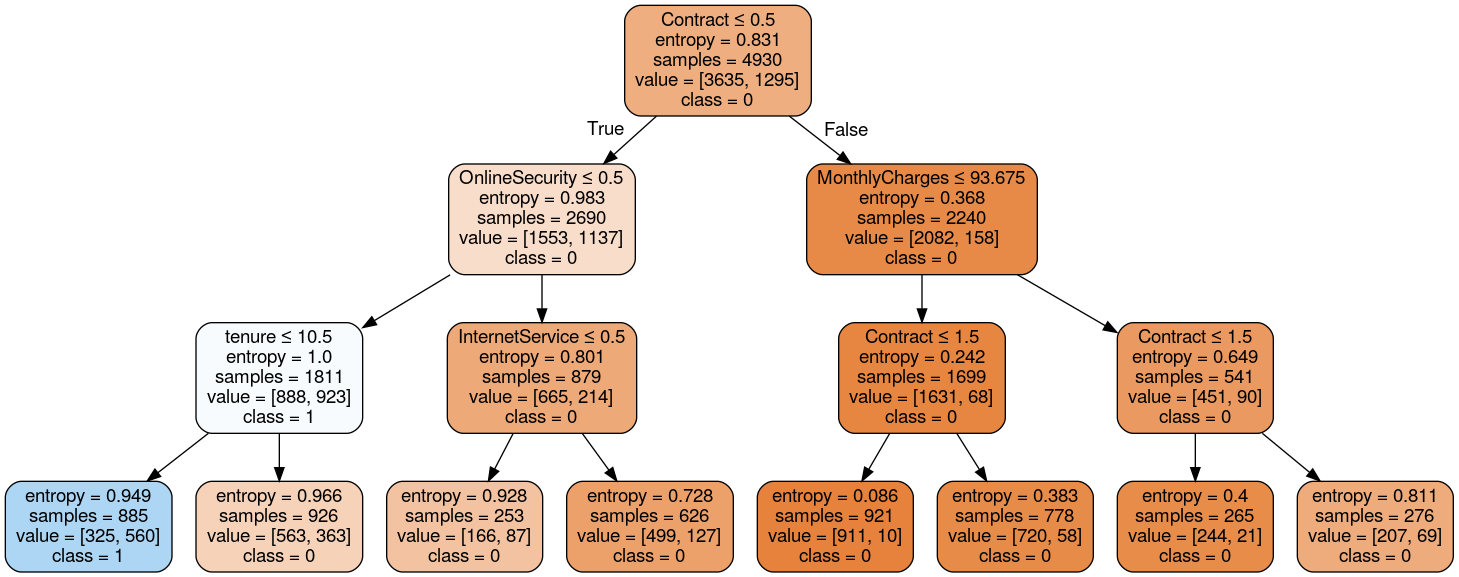

In [12]:
feature_cols = ["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges"]

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn.png')
graph.write_pdf('churn.pdf') #Create pdf
Image(graph.create_png())

### 4.Report the RMSE of your model on the training set and on the test set. How successful is the model?

In [13]:
 print("RMSE for test is: " + str(mean_squared_error(y_test, y_pred)))

RMSE for test is: 0.22337908187411262


In [16]:
y_pred_train = model.predict(X_train)

print("RMSE for train is: " + str(mean_squared_error(y_train, y_pred_train)))

RMSE for train is: 0.2150101419878296
